<a href="https://colab.research.google.com/github/ahc72/NLP-Project/blob/master/Analysis_and_Prediction_Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANLY 580 NLP
## Genre Classification 
### Analysis and Prediction Model
### April Chung

In [0]:
import pandas as pd
import nltk
import re
from gensim import models, corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from nltk import word_tokenize
from nltk.corpus import stopwords

from tqdm import tqdm
from nltk.tokenize import RegexpTokenizer

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
!pip install pyLDAvis

    100% |████████████████████████████████| 1.6MB 15.8MB/s 
  Running setup.py bdist_wheel for pyLDAvis ... - \ done
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [0]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
songs = pd.read_csv("/content/drive/My Drive/Colab Notebooks/lyrics_genre.csv")

In [8]:
songs['genre'].unique()

array(['europop', 'dance pop', 'comic', 'pop', 'rock', 'mellow gold',
       'opm', 'country', 'operatic pop', 'folk', 'new wave pop',
       'christian music', 'soft rock', 'soul', 'adult standards', 'disco',
       'irish folk', 'tin pan alley', 'pop rock', 'dance rock',
       'art rock', 'indonesian pop', 'pop rap', 'christmas', 'rap',
       'celtic', 'classic finnish rock', 'post-grunge', 'rap rock',
       'k-pop', 'punk', 'new romantic', 'modern rock', 'electronic',
       'classic rock', 'world', 'celtic rock', 'permanent wave',
       'traditional country', 'edm', 'roots rock', 'acid jazz', 'worship',
       'folk rock', 'album rock', 'gospel', 'classic bollywood',
       'hollywood', 'rock-and-roll', 'reggae', 'alternative rock',
       'power metal', 'britpop', 'mizrahi', 'progressive metal',
       'neo mellow', 'hip hop', 'dark wave', 'lo-fi', 'alternative metal',
       "canadian children's music", 'reggae fusion', 'canadian rock',
       'emo', 'nu metal', 'chamber pop'

In [0]:
genres = dict(songs["genre"].value_counts())

In [10]:
genres.values()

dict_values([20277, 5347, 5266, 2716, 2570, 1290, 1239, 1100, 1069, 1064, 744, 725, 572, 541, 445, 419, 394, 393, 383, 367, 341, 336, 302, 300, 240, 235, 206, 191, 177, 177, 174, 174, 169, 161, 159, 158, 148, 132, 115, 100, 98, 97, 88, 88, 85, 83, 75, 74, 71, 71, 69, 67, 63, 63, 60, 52, 46, 41, 40, 36, 35, 32, 30, 30, 30, 28, 25, 25, 24, 20, 18, 18, 18, 17, 12, 10, 9, 8, 5, 5, 3, 3, 2, 1])

In [11]:
len(genres)

84

In [0]:
songs[songs['genre']=='k-pop']

,Unnamed: 0,artist,song,link,text,genre
5427,5695,Exo,Exodus,/e/exo/exodus_21097244.html,Stand up! oechyeodo gyeolgugen dabeun no \nBu...,k-pop
5428,5696,Exo,Moonlight,/e/exo/moonlight_21082834.html,"Yeah, stop, stop. Those wings will get wet oh,...",k-pop
5429,5697,Exo-K,Hurt,/e/exo+k/hurt_21098367.html,[D.O] yudok jitge baen neoui hyanggie \nBari ...,k-pop
5430,5698,Exo-K,Overdose,/e/exo+k/overdose_21082897.html,Come in \n \n[Baekhyun] Modeungeol geolgo ne...,k-pop
29804,32196,Exo,Run,/e/exo/run_21082836.html,Eodideun joha uri oneulbam tteonabollae? Tteon...,k-pop


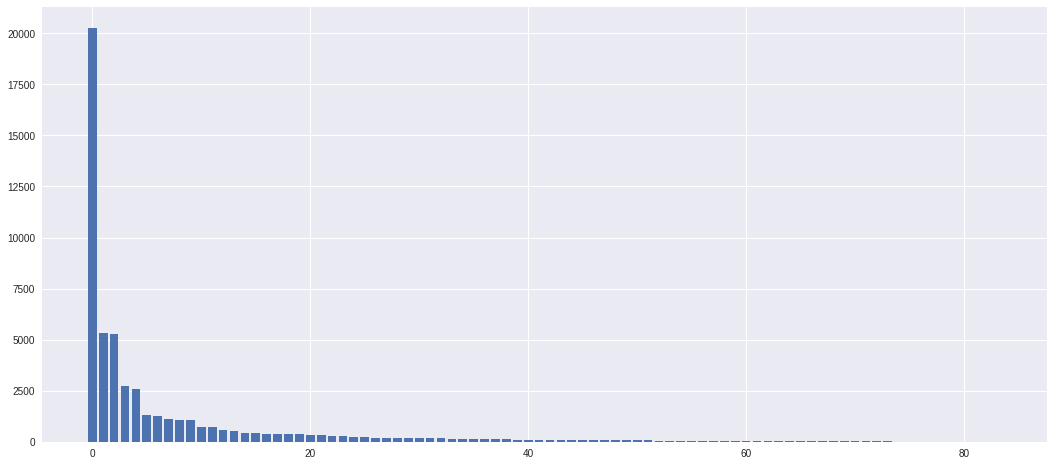

In [12]:
import numpy as np
import matplotlib.pyplot as plt
y_pos = np.arange(len(list(genres.keys())))
plt.figure(figsize = (18,8))
plt.bar(y_pos, list(genres.values()))
#plt.xticks(y_pos, list(genres.index))
plt.show()

In [0]:
short_genre = {k:v for k,v in genres.items() if v > 200}

In [15]:
len(short_genre)

27

In [14]:
print("We still keep about", sum(short_genre.values()), "lyrics")

We still keep about 48881 lyrics


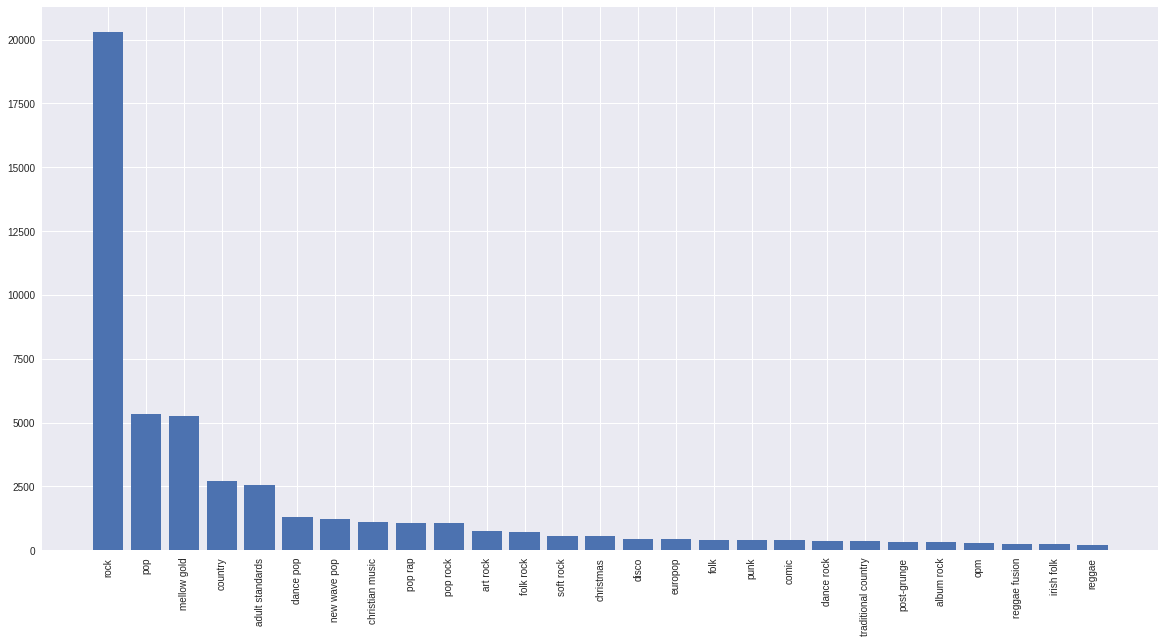

In [16]:
y_pos = np.arange(len(list(short_genre.keys())))
y_pos
plt.figure(figsize = (20,10))
plt.bar(y_pos, list(short_genre.values()))
plt.xticks(y_pos, list(short_genre.keys()))
plt.xticks(rotation=90)
plt.show()

In [0]:
remove_genres = [k for k,v in genres.items() if v <= 200]

In [0]:
for a in remove_genres:
    songs = songs[songs['genre'] != a]

In [19]:
songs['text'].head()

0    Look at her face, it's a wonderful face  \nAnd...
1    Take it easy with me, please  \nTouch me gentl...
2    I'll never know why I had to go  \nWhy I had t...
3    Making somebody happy is a question of give an...
4    Making somebody happy is a question of give an...
Name: text, dtype: object

In [20]:
stopWORDS = stopwords.words('english')
more_stopwords = ['like', 'yeah','got', 'get', 'little', 'never', 'gonna']
stopWORDS.append(more_stopwords)
tokenized = []
tokenizer = RegexpTokenizer(r'\w+')

for lyrics in tqdm(songs['text']):
    raw = lyrics.lower()
    tokens = tokenizer.tokenize(raw)
    cleaned = [t for t in tokens if t not in stopWORDS]
    tokenized.append(cleaned)

100%|██████████| 48881/48881 [00:23<00:00, 2091.46it/s]


In [0]:
dictionary = corpora.Dictionary(tokenized)
corpus_tokenized = [dictionary.doc2bow(text) for text in tokenized]

In [0]:
lda_model = models.LdaModel(corpus=corpus_tokenized, num_topics=10, id2word=dictionary)

In [26]:
coherence_values = []
model_list = []
for num_topics in tqdm(range(2, 20, 5)):
    model=models.LdaModel(corpus=corpus_tokenized, id2word=dictionary, num_topics=num_topics)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=tokenized, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

100%|██████████| 4/4 [06:47<00:00, 100.51s/it]


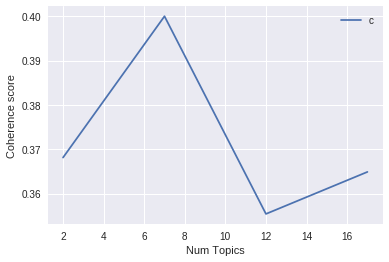

In [27]:
x = range(2, 20, 5)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [0]:
tfor idx in range(10):
    print("Topic %s:" % idx, lda_model.print_topic(idx, 10))

Topic 0: 0.075*"oh" + 0.030*"yeah" + 0.014*"god" + 0.013*"lord" + 0.009*"world" + 0.008*"sing" + 0.008*"free" + 0.007*"whoa" + 0.006*"heaven" + 0.006*"let"
Topic 1: 0.020*"little" + 0.019*"da" + 0.010*"christmas" + 0.007*"happy" + 0.006*"town" + 0.006*"river" + 0.006*"go" + 0.006*"day" + 0.006*"boy" + 0.005*"old"
Topic 2: 0.022*"man" + 0.014*"like" + 0.011*"got" + 0.011*"well" + 0.010*"home" + 0.007*"one" + 0.005*"said" + 0.005*"life" + 0.005*"right" + 0.005*"never"
Topic 3: 0.030*"know" + 0.018*"like" + 0.014*"one" + 0.014*"see" + 0.013*"hey" + 0.012*"say" + 0.010*"want" + 0.010*"go" + 0.010*"think" + 0.009*"look"
Topic 4: 0.059*"love" + 0.025*"baby" + 0.024*"know" + 0.020*"let" + 0.019*"want" + 0.016*"oh" + 0.013*"make" + 0.013*"need" + 0.013*"gonna" + 0.013*"heart"
Topic 5: 0.055*"get" + 0.025*"want" + 0.022*"got" + 0.018*"take" + 0.018*"back" + 0.016*"yeah" + 0.013*"ah" + 0.012*"gotta" + 0.010*"way" + 0.009*"alright"
Topic 6: 0.019*"like" + 0.017*"got" + 0.013*"get" + 0.012*"nigga"

In [0]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence(
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3893421622746832


In [0]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus_tokenized, dictionary)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
4      21.429867        1       1 -0.120977 -0.057590
7      20.073241        1       2 -0.126686  0.077677
3      10.930410        1       3 -0.096636 -0.049134
2      10.720966        1       4 -0.057248 -0.014889
6       9.130781        1       5  0.007119 -0.190588
8       8.685259        1       6 -0.048214  0.165414
0       6.139772        1       7 -0.021514  0.109548
5       5.922410        1       8 -0.020849 -0.172628
1       5.025558        1       9  0.047521  0.134546
9       1.941736        1      10  0.437484 -0.002357, topic_info=      Category          Freq        Term         Total  loglift  logprob
term                                                                    
59     Default  46567.000000          oh  46567.000000  30.0000  30.0000
110    Default  79610.000000        love  79610.000000  29.0000  29.0000
101    Default  37147.000000         get  37147.000000  28.0000  28.0000
649    Default   9549.000000          la   9549.000000  27.0000  27.0000
1022   Default  27539.000000        yeah  27539.000000  26.0000  26.0000
457    Default  37332.000000        want  37332.000000  25.0000  25.0000
82     Default  32971.000000        baby  32971.000000  24.0000  24.0000
3625   Default   6649.000000          na   6649.000000  23.0000  23.0000
493    Default  40097.000000         got  40097.000000  22.0000  22.0000
50     Default  63511.000000        know  63511.000000  21.0000  21.0000
153    Default  15934.000000      little  15934.000000  20.0000  20.0000
562    Default  20818.000000         man  20818.000000  19.0000  19.0000
6553   Default   4914.000000          da   4914.000000  18.0000  18.0000
72     Default  27083.000000        take  27083.000000  17.0000  17.0000
338    Default  24567.000000        back  24567.000000  16.0000  16.0000
14094  Default   5683.000000       nigga   5683.000000  15.0000  15.0000
104    Default   8943.000000       gotta   8943.000000  14.0000  14.0000
850    Default  10249.000000         hey  10249.000000  13.0000  13.0000
102    Default   6892.000000         god   6892.000000  12.0000  12.0000
182    Default  23438.000000       gonna  23438.000000  11.0000  11.0000
704    Default   6905.000000          ya   6905.000000  10.0000  10.0000
461    Default   4616.000000          ah   4616.000000   9.0000   9.0000
383    Default   4972.000000        lord   4972.000000   8.0000   8.0000
51     Default  33560.000000         let  33560.000000   7.0000   7.0000
54     Default  52055.000000        like  52055.000000   6.0000   6.0000
391    Default   6027.000000       dance   6027.000000   5.0000   5.0000
2318   Default   4327.000000        fuck   4327.000000   4.0000   4.0000
2329   Default   4355.000000        shit   4355.000000   3.0000   3.0000
417    Default   4876.000000          em   4876.000000   2.0000   2.0000
833    Default  22796.000000       heart  22796.000000   1.0000   1.0000
...        ...           ...         ...           ...      ...      ...
5799   Topic10    173.349242      gloria    174.299531   3.9361  -6.3724
4258   Topic10    153.778420        ikaw    154.642736   3.9360  -6.4922
692    Topic10    228.782687          tu    230.123984   3.9357  -6.0949
19189  Topic10    135.856897  millennium    136.723007   3.9352  -6.6161
17327  Topic10    125.632483       manic    126.459104   3.9350  -6.6944
18531  Topic10    334.877820        nana    337.098237   3.9350  -5.7139
2339   Topic10    379.310821          ee    381.834437   3.9350  -5.5894
14445  Topic10    123.313712     starter    124.149947   3.9348  -6.7130
16191  Topic10    118.911892       poppa    119.739593   3.9347  -6.7493
139    Topic10   1545.557903        boom   1560.261452   3.9321  -4.1846
19696  Topic10    157.361699         les    158.732338   3.9329  -6.4692
143    Topic10   1474.996832          de   1558.129545   3.8868  -4.2313
40738  Topic10    309.16

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.utils import to_categorical

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


In [0]:
np.unique(songs['genre'])

array(['adult standards', 'album rock', 'art rock', 'christian music',
       'christmas', 'comic', 'country', 'dance pop', 'dance rock',
       'disco', 'europop', 'folk', 'folk rock', 'irish folk',
       'mellow gold', 'new wave pop', 'opm', 'pop', 'pop rap', 'pop rock',
       'post-grunge', 'punk', 'reggae', 'reggae fusion', 'rock',
       'soft rock', 'traditional country'], dtype=object)

In [0]:
songs['genre']= songs['genre'].replace('album rock','rock')
songs['genre']= songs['genre'].replace('art rock','rock')
songs['genre']= songs['genre'].replace('dance rock','rock')
songs['genre']= songs['genre'].replace('soft rock','rock')
songs['genre']= songs['genre'].replace('post-grunge','rock')

In [0]:
songs['genre']= songs['genre'].replace('dance pop','pop')
songs['genre']= songs['genre'].replace('europop','pop')
songs['genre']= songs['genre'].replace('pop rock','pop')
songs['genre']= songs['genre'].replace('new wave pop','pop')

In [0]:
songs['genre']= songs['genre'].replace('folk rock','folk')
songs['genre']= songs['genre'].replace('irish folk','folk')

In [0]:
songs['genre']= songs['genre'].replace('reggae fusion','reggae')
songs['genre']= songs['genre'].replace('traditional country','country')

In [0]:
songs['genre']= songs['genre'].replace('mellow gold','mellow')
songs['genre']= songs['genre'].replace('pop rap','rap')

Change all the Christmas genre artist with other genres

In [0]:
np.unique(songs[songs['genre'] == 'christmas']['artist'])

array(['Elvis Presley', 'Idina Menzel', 'Irving Berlin', 'Nina Simone',
       'Otis Redding'], dtype=object)

In [0]:
songs.loc[songs['artist'] == 'Elvis Presley', 'genre'] = 'adult standards'
songs.loc[songs['artist'] == 'Idina Menzel', 'genre'] = 'pop'
songs.loc[songs['artist'] == 'Irving Berlin', 'genre'] = 'adult standards'
songs.loc[songs['artist'] == 'Nina Simone', 'genre'] = 'folk'
songs.loc[songs['artist'] == 'Otis Redding', 'genre'] = 'folk'

In [0]:
new_genres = dict(songs["genre"].value_counts())

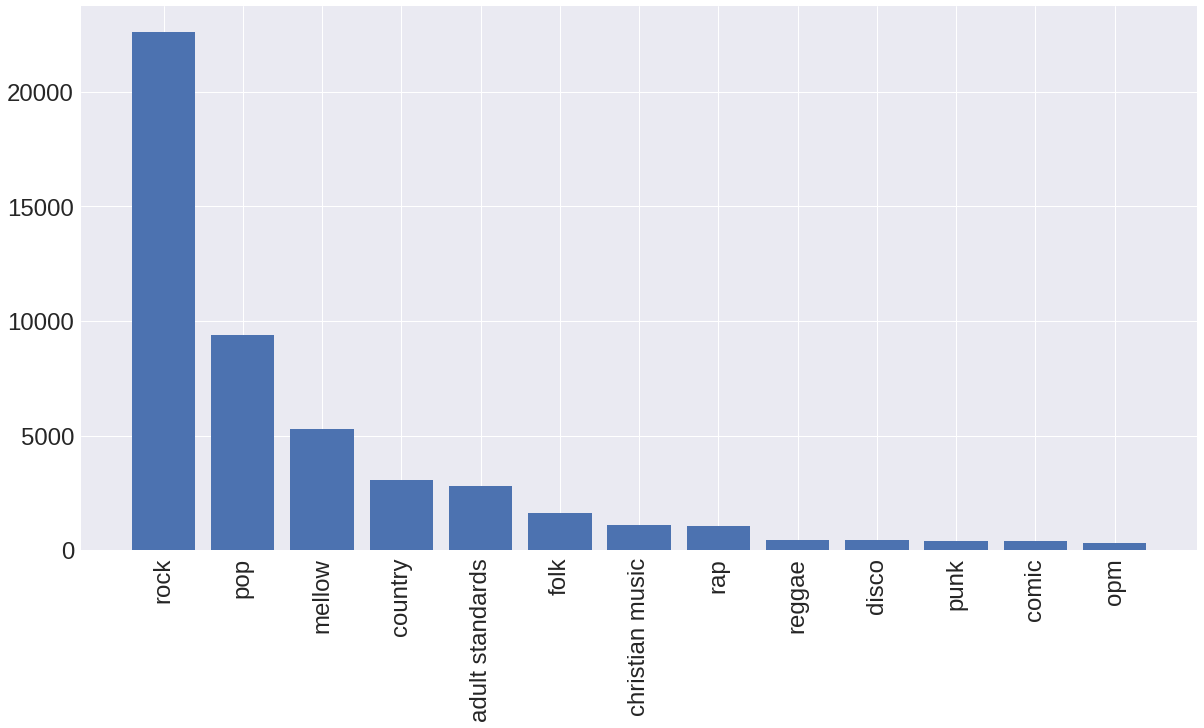

In [0]:
y_pos = np.arange(len(list(new_genres)))
y_pos
plt.figure(figsize = (20,10))
plt.bar(y_pos, list(new_genres.values()))
plt.xticks(y_pos, list(new_genres.keys()))
plt.xticks(rotation=90)
plt.tick_params(labelsize = 24)
plt.show()

In [0]:
import keras
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout, Input, Flatten, CuDNNLSTM, GlobalAveragePooling1D

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report

In [0]:
tokenizer2 = Tokenizer(num_words = 100000)
# Building the word index
tokenizer2.fit_on_texts(songs['text'])
sequences = tokenizer2.texts_to_sequences(songs['text'])
songs['text_tokenized'] = sequences

In [0]:
songs['genre_id'] = pd.Categorical(songs.genre).codes

In [0]:
len(np.unique(songs.genre_id))

13

In [0]:
songs.shape

(48881, 8)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(songs['text_tokenized'], songs['genre_id'], test_size=0.33, random_state=728)

In [0]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [0]:
class_weights

array([ 1.34862461,  3.39062015,  9.72675973,  1.22114919,  8.07445759,
        2.33262108,  0.71752514, 12.85321821,  0.39873865,  9.72675973,
        3.56831554,  8.31429297,  0.16648366])

In [0]:
y_train =to_categorical(y_train, 13)
y_test = to_categorical(y_test,13)

In [0]:
y_train.shape

(32750, 13)

In [0]:
maxlen = int(max(songs['text_tokenized'].str.len())/3)
print(maxlen)
X_train = sequence.pad_sequences(X_train, maxlen = maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

275


In [0]:
X_train.shape

(32750, 275)

In [0]:
songs['genre_id'].values

array([ 8,  8,  8, ..., 11, 11, 11], dtype=int8)

In [0]:
x = songs['text'].values
y = songs['genre_id'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=22)

tfidf_vec   = TfidfVectorizer()
x_train_vec = tfidf_vec.fit_transform(x_train)
x_test_vec  = tfidf_vec.transform(x_test)
x_train_vec.shape

(39104, 61421)

In [0]:
from sklearn.svm import LinearSVC
clf             = LinearSVC().fit(x_train_vec, y_train)
predicted       = clf.predict(x_test_vec)
predicted_score = clf.decision_function(x_test_vec)

In [0]:
print('accuracy', metrics.accuracy_score(y_test, predicted))

accuracy 0.5461798097575944


In [0]:
train_predicted = clf.predict(x_train_vec)
train_predicted_score = clf.decision_function(x_train_vec)

print('train accuracy', metrics.accuracy_score(y_train, train_predicted))

train accuracy 0.7862622749590835


In [0]:
max_features = 10000
model = Sequential()
model.add(Embedding(input_dim = max_features, output_dim = 50))
model.add(LSTM(50))
model.add(Dense(13, activation ='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 50)          500000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 13)                663       
Total params: 520,863
Trainable params: 520,863
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, 
                    epochs = 1, batch_size = 64, 
                    validation_data = (X_test, y_test),
                    verbose=1)

Train on 32750 samples, validate on 16131 samples
Epoch 1/1
32750/32750 [==============================] - 438s 13ms/step - loss: 1.1921e-07 - acc: 0.0570 - val_loss: 1.1921e-07 - val_acc: 0.0583


In [0]:
max_features = 10000
model = Sequential()
model.add(Embedding(input_dim = max_features, output_dim = 50))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.25))
model.add(Dense(13, activation ='softmax'))

In [0]:
opt = keras.optimizers.Adam(lr=0.001) # speed up optimization
model.compile(loss='categorical_crossentropy', optimizer=opt ,metrics=["accuracy"])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, None, 50)          500000    
_________________________________________________________________
global_average_pooling1d_15  (None, 50)                0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 13)                663       
Total params: 500,663
Trainable params: 500,663
Non-trainable params: 0
_________________________________________________________________


In [0]:
history2 = model.fit(X_train, y_train, 
                    epochs = 30, batch_size = 128, 
                    validation_data = (X_test, y_test),
                    verbose=1)

Train on 32750 samples, validate on 16131 samples
Epoch 1/30
32750/32750 [==============================] - 3s 94us/step - loss: 1.9691 - acc: 0.4539 - val_loss: 1.6993 - val_acc: 0.4628
Epoch 2/30
32750/32750 [==============================] - 2s 70us/step - loss: 1.6796 - acc: 0.4650 - val_loss: 1.6466 - val_acc: 0.4731
Epoch 3/30
32750/32750 [==============================] - 2s 70us/step - loss: 1.6320 - acc: 0.4880 - val_loss: 1.6106 - val_acc: 0.4964
Epoch 4/30
32750/32750 [==============================] - 2s 71us/step - loss: 1.5973 - acc: 0.4989 - val_loss: 1.5795 - val_acc: 0.5030
Epoch 5/30
32750/32750 [==============================] - 2s 70us/step - loss: 1.5604 - acc: 0.5044 - val_loss: 1.5500 - val_acc: 0.5048
Epoch 6/30
32750/32750 [==============================] - 2s 69us/step - loss: 1.5252 - acc: 0.5097 - val_loss: 1.5239 - val_acc: 0.5075
Epoch 7/30
32750/32750 [==============================] - 2s 71us/step - loss: 1.4930 - acc: 0.5141 - val_loss: 1.5002 - val_acc

Text(0,0.5,'accuracy')

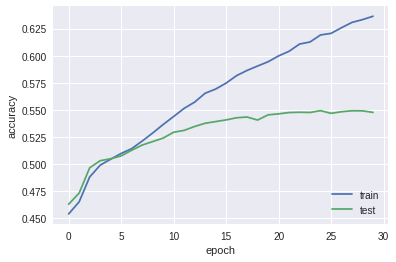

In [0]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.legend(['train', 'test'], loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy')

Text(0,0.5,'loss')

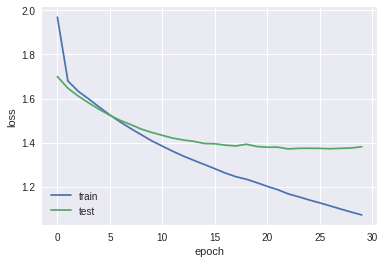

In [0]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['train', 'test'], loc='lower left')
plt.xlabel('epoch')
plt.ylabel('loss')

In [0]:
Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.43      0.25      0.32       940
          1       0.68      0.45      0.54       357
          2       0.70      0.15      0.25       124
          3       0.39      0.21      0.27       994
          4       0.00      0.00      0.00       133
          5       0.40      0.00      0.01       544
          6       0.26      0.10      0.15      1755
          7       0.91      0.30      0.45       104
          8       0.52      0.45      0.48      3074
          9       0.00      0.00      0.00       134
         10       0.68      0.53      0.60       363
         11       0.68      0.09      0.16       143
         12       0.58      0.86      0.69      7466

avg / total       0.51      0.55      0.49     16131



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
songs.groupby(['genre', 'genre_id']).size().reset_index(name='Freq')

,genre,genre_id,Freq
0,adult standards,0,2808
1,christian music,1,1100
2,comic,2,383
3,country,3,3057
4,disco,4,445
5,folk,5,1624
6,mellow,6,5266
7,opm,7,300
8,pop,8,9392
9,punk,9,393
